# Rainy season
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [6]:
%matplotlib notebook

import xarray as xr
from geoplots import mapplot
from misc.jupyter import end_interactive

In [2]:
ncfile = '/tigress/wenchang/data/chirps/chirps-v2.0.monthly_p25.nc'
ds = xr.open_dataset(ncfile).sel(time=slice('1981', '2017'))
da = ds.precip
da

<xarray.DataArray 'precip' (time: 444, latitude: 400, longitude: 1440)>
[255744000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16 1981-02-14T12:00:00 ...
  * longitude  (longitude) float32 -179.875 -179.625 -179.375 -179.125 ...
  * latitude   (latitude) float32 -49.875 -49.625 -49.375 -49.125 -48.875 ...
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [3]:
# lons = slice(-30, 180)
# lats = slice(-30,30)
da = ds.precip.groupby('time.month').mean('time')

<IPython.core.display.Javascript object>


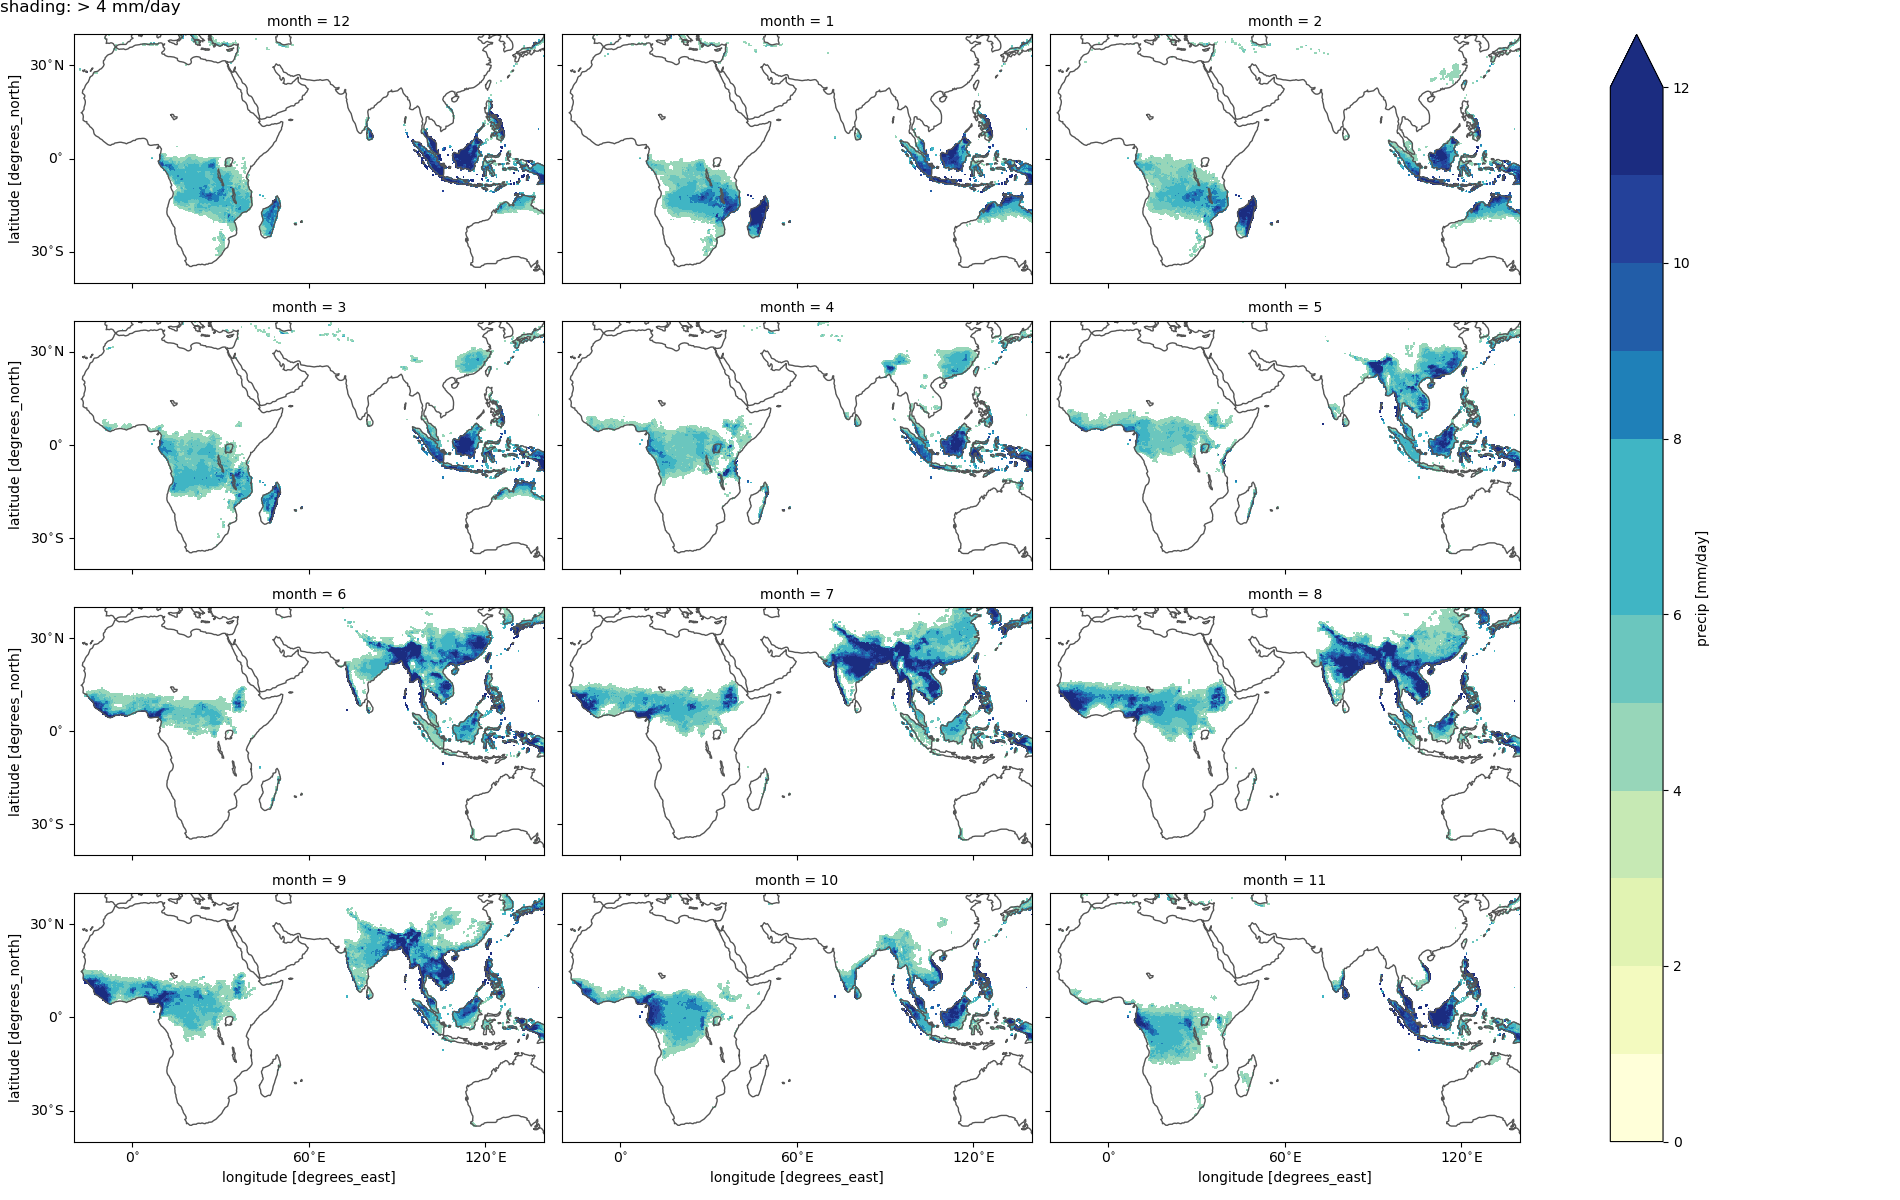

In [12]:
R = 4 # threshold
lonlim = (-20, 140)
latlim = (-40, 40)
aspect = (lonlim[1] - lonlim[0])/(latlim[1] - latlim[0])
f = da.pipe(lambda x: x.where(x>R)) \
    .rename('precip [mm/day]') \
    .roll(month=1) \
    .plot(col='month', col_wrap=3, robust=True, cmap='YlGnBu', levels=np.arange(0,13), aspect=aspect)
for ax in f.axes.flat:
    plt.sca(ax)
    mapplot()
    ax.set_xlim(lonlim)
    ax.set_ylim(latlim)

plt.suptitle(f'shading: > {R} mm/day', x=0, y=1, ha='left', va='top')
# plt.tight_layout()
end_interactive()

In [10]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>